In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder,PowerTransformer
from feature_engine.encoding import WoEEncoder

from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize']=[15,8]

In [3]:
df=pd.read_csv('Clean.csv',index_col=0)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_year,issue_month,earliest_cr_line_month,earliest_cr_line_year
0,10000.000000,36 months,11.440000,329.480000,B,B4,Marketing,10+ years,RENT,117000.000000,Not Verified,Fully Paid,vacation,Vacation,26.240000,16,0,36369.000000,41.800000,25,w,INDIVIDUAL,0,0,2015,1,6,1990
1,8000.000000,36 months,11.990000,265.680000,B,B5,Credit analyst,4 years,MORTGAGE,65000.000000,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,22.050000,17,0,20131.000000,53.300000,27,f,INDIVIDUAL,3,0,2015,1,7,2004
2,15600.000000,36 months,10.490000,506.970000,B,B3,Statistician,< 1 year,RENT,43057.000000,Source Verified,Fully Paid,credit_card,Credit card refinancing,12.790000,13,0,11987.000000,92.200000,26,f,INDIVIDUAL,0,0,2015,1,8,2007
3,7200.000000,36 months,6.490000,220.650000,A,A2,Client Advocate,6 years,RENT,54000.000000,Not Verified,Fully Paid,credit_card,Credit card refinancing,2.600000,6,0,5472.000000,21.500000,13,f,INDIVIDUAL,0,0,2014,11,9,2006
4,24375.000000,60 months,17.270000,609.330000,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.000000,Verified,Charged Off,credit_card,Credit Card Refinance,33.950000,13,0,24584.000000,69.800000,43,f,INDIVIDUAL,1,0,2013,4,3,1999


In [4]:
# getting rid of the redundant columns and rows
df1=df[~(df['dti']>300)]
df1.drop(columns=['issue_year', 'issue_month','earliest_cr_line_month', 'earliest_cr_line_year','sub_grade','initial_list_status','emp_title','title'],inplace=True)

In [5]:
df1_num=df1.select_dtypes(include=np.number)
df1_num.reset_index(inplace=True,drop=True)
df1_num.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.000000,11.440000,329.480000,117000.000000,26.240000,16,0,36369.000000,41.800000,25,0,0
1,8000.000000,11.990000,265.680000,65000.000000,22.050000,17,0,20131.000000,53.300000,27,3,0
2,15600.000000,10.490000,506.970000,43057.000000,12.790000,13,0,11987.000000,92.200000,26,0,0
3,7200.000000,6.490000,220.650000,54000.000000,2.600000,6,0,5472.000000,21.500000,13,0,0
4,24375.000000,17.270000,609.330000,55000.000000,33.950000,13,0,24584.000000,69.800000,43,1,0


In [6]:
df1_cat=df1.select_dtypes(include=object)
df1_cat.drop(columns='loan_status',inplace=True)
df1_cat.reset_index(inplace=True,drop=True)
df1_cat.head()

,term,grade,emp_length,home_ownership,verification_status,purpose,application_type
0,36 months,B,10+ years,RENT,Not Verified,vacation,INDIVIDUAL
1,36 months,B,4 years,MORTGAGE,Not Verified,debt_consolidation,INDIVIDUAL
2,36 months,B,< 1 year,RENT,Source Verified,credit_card,INDIVIDUAL
3,36 months,A,6 years,RENT,Not Verified,credit_card,INDIVIDUAL
4,60 months,C,9 years,MORTGAGE,Verified,credit_card,INDIVIDUAL


In [7]:
dum=df1_cat.loc[:,['verification_status','application_type','term']]
dummy=pd.get_dummies(dum,drop_first=True)
dummy.reset_index(drop=True,inplace=True)
dummy.head()

,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,term_ 60 months
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,1,0,0
3,0,0,1,0,0
4,0,1,1,0,1


In [8]:
df1_cat.drop(columns=['verification_status','application_type','term'],inplace=True)


In [9]:
#creating a new data set with the Principal Components
df1_rfe=pd.concat([df1_cat,dummy,df1_num],axis=1)
df1_rfe.head()

,grade,emp_length,home_ownership,purpose,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,term_ 60 months,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,B,10+ years,RENT,vacation,0,0,1,0,0,10000.000000,11.440000,329.480000,117000.000000,26.240000,16,0,36369.000000,41.800000,25,0,0
1,B,4 years,MORTGAGE,debt_consolidation,0,0,1,0,0,8000.000000,11.990000,265.680000,65000.000000,22.050000,17,0,20131.000000,53.300000,27,3,0
2,B,< 1 year,RENT,credit_card,1,0,1,0,0,15600.000000,10.490000,506.970000,43057.000000,12.790000,13,0,11987.000000,92.200000,26,0,0
3,A,6 years,RENT,credit_card,0,0,1,0,0,7200.000000,6.490000,220.650000,54000.000000,2.600000,6,0,5472.000000,21.500000,13,0,0
4,C,9 years,MORTGAGE,credit_card,0,1,1,0,1,24375.000000,17.270000,609.330000,55000.000000,33.950000,13,0,24584.000000,69.800000,43,1,0


In [10]:
# bining variables for shake of simplicity
df1_rfe['home_ownership']=df1_rfe['home_ownership'].replace(['OTHER', 'NONE', 'ANY'],'OTHERS')

In [11]:
df1['loan_status']=df1['loan_status'].map({'Fully Paid':0,'Charged Off':1})

In [12]:
X=df1_rfe.copy()
y=df1.loan_status

#splitting test train sets with 30:70 ratio respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (277218, 21)
y_train (277218,)
X_test (118809, 21)
y_test (118809,)


In [13]:
X_train.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
X_test.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)

In [14]:
#encoding categorical variables

le=LabelEncoder()
Oe=OrdinalEncoder()
Ohe=OneHotEncoder()
clf=WoEEncoder()


# train set

X_train['home_ownership']=clf.fit_transform(X_train[['home_ownership']],y_train)
X_train['purpose']=clf.fit_transform(X_train[['purpose']],y_train)
X_train['grade']=Oe.fit_transform(X_train[['grade']])
X_train['emp_length']=Oe.fit_transform(X_train[['emp_length']])

# test set

X_test['home_ownership']=clf.fit_transform(X_test[['home_ownership']],y_test)
X_test['purpose']=clf.fit_transform(X_test[['purpose']],y_test)
X_test['grade']=Oe.fit_transform(X_test[['grade']])
X_test['emp_length']=Oe.fit_transform(X_test[['emp_length']])


In [15]:
X_train.head()

,grade,emp_length,home_ownership,purpose,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,term_ 60 months,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,3.000000,10.000000,0.185404,0.072537,1,0,1,0,0,12000.000000,20.200000,447.190000,60000.000000,17.040000,29,0,14668.000000,79.700000,59,1,0
1,2.000000,10.000000,0.185404,0.072537,0,0,1,0,1,7200.000000,13.610000,166.080000,37400.000000,14.050000,6,0,3087.000000,88.200000,15,1,0
2,1.000000,4.000000,0.185404,0.072537,0,1,1,0,0,15000.000000,12.120000,499.080000,78000.000000,18.140000,16,0,11141.000000,97.700000,32,0,0
3,0.000000,1.000000,-0.179948,0.072537,1,0,1,0,0,15000.000000,7.260000,464.950000,65000.000000,17.580000,9,0,9904.000000,43.400000,13,1,0
4,1.000000,2.000000,0.185404,-0.193208,1,0,1,0,0,11200.000000,10.990000,366.630000,59000.000000,29.660000,8,0,12022.000000,64.300000,12,0,0


In [16]:
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

In [17]:

# initiate linear regression model to use in feature selection
xgboost_rfe = XGBClassifier(learning_rate=0.1,max_depth = 12, gamma = 1)

# build the RFE model

rfe_model = RFE(estimator=xgboost_rfe, n_features_to_select = 12)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE

feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['grade', 'home_ownership', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'term_ 60 months', 'loan_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'revol_bal', 'mort_acc'],
      dtype='object')


In [22]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model,X_train):
    
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

In [24]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model,X_test):
    
    test_pred = model.predict(X_test)

    # return the performace measures on test set
    return(classification_report(y_test, test_pred))

In [20]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    
    cm = confusion_matrix(y_test, y_pred)

    
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

  
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

In [30]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model, test_data):
    

    y_pred_prob = model.predict_proba(test_data)[:,1]
    
   
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

   
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

In [25]:
# store the X_train with significant variables in new_X_train
new_X_train = X_train[['grade', 'home_ownership', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'term_ 60 months', 'loan_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'revol_bal', 'mort_acc']]
# store the X_train with significant variables in new_X_test
new_X_test = X_test[['grade', 'home_ownership', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'term_ 60 months', 'loan_amnt', 'int_rate',
       'installment', 'annual_inc', 'dti', 'revol_bal', 'mort_acc']]


xgb_model = XGBClassifier(learning_rate=0.1,max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(new_X_train, y_train)

# compute the performance measures on train data
train_report = get_train_report(xgb_model,new_X_train)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(xgb_model,new_X_test)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.82      0.99      0.90    222746
           1       0.77      0.13      0.22     54472

    accuracy                           0.82    277218
   macro avg       0.80      0.56      0.56    277218
weighted avg       0.81      0.82      0.76    277218

Test data:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89     95609
           1       0.53      0.08      0.14     23200

    accuracy                           0.81    118809
   macro avg       0.67      0.53      0.51    118809
weighted avg       0.76      0.81      0.74    118809



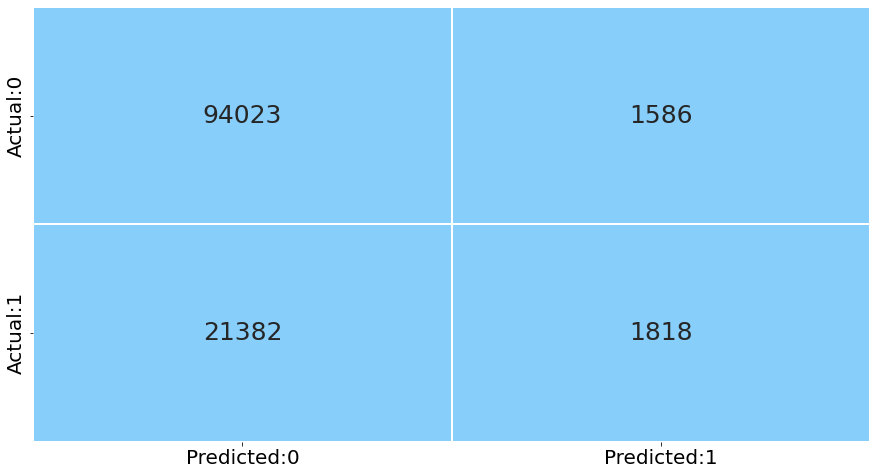

In [29]:
plot_confusion_matrix(xgb_model,new_X_test)

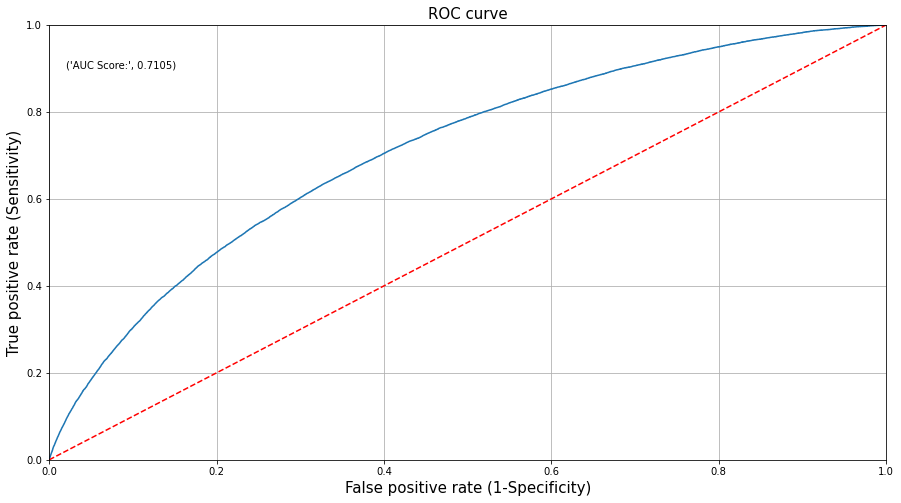

In [31]:
plot_roc(xgb_model,new_X_test)

## XGboost with RFE (features only) Oversampling Model 

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [27]:
ros=RandomOverSampler(random_state=10)
X_train_resampled,y_train_resampled=ros.fit_resample(new_X_train,y_train)

In [28]:
xgb_model_resampled = XGBClassifier(learning_rate=0.1,max_depth = 12, gamma = 1)

# fit the model using fit() on train data
xgb_model_resampled.fit(X_train_resampled, y_train_resampled)

# compute the performance measures on train data
train_report = get_train_report(xgb_model_resampled,new_X_train)

# print the performance measures
print('Train data:\n', train_report)

# compute the performance measures on test data
test_report = get_test_report(xgb_model_resampled,new_X_test)

# print the performance measures
print('Test data:\n', test_report)

Train data:
               precision    recall  f1-score   support

           0       0.94      0.78      0.85    222746
           1       0.47      0.80      0.60     54472

    accuracy                           0.79    277218
   macro avg       0.71      0.79      0.72    277218
weighted avg       0.85      0.79      0.80    277218

Test data:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79     95609
           1       0.33      0.56      0.42     23200

    accuracy                           0.70    118809
   macro avg       0.60      0.64      0.61    118809
weighted avg       0.77      0.70      0.72    118809



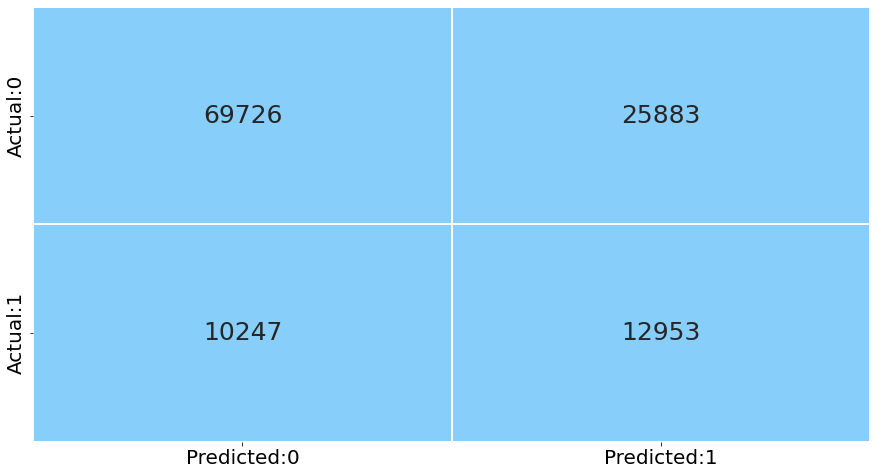

In [32]:
plot_confusion_matrix(xgb_model_resampled,new_X_test)

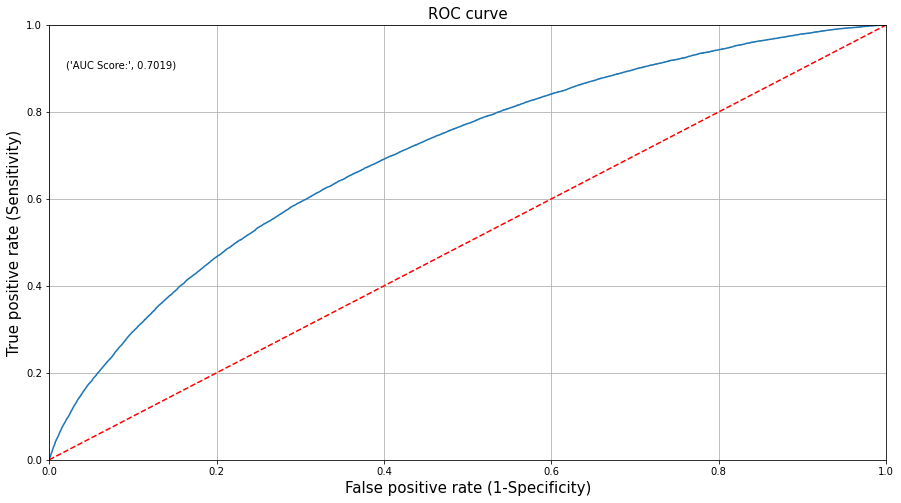

In [33]:
plot_roc(xgb_model_resampled,new_X_test)